1) Question or problem definition
- Thématiques : Budgétaire/Commerce, Ressources Humaines, Logistique/Géographie
- Sujets : Fournisseur, Messager

2) Acquire training and testing data.

In [2]:
# Importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as mysqlConnector
from functools import reduce

# Data Loading
df_categorie=pd.read_csv('data/categorie.csv')
df_client=pd.read_csv('data/client.csv')
df_commande=pd.read_csv('data/commande.csv')
df_detailscommande=pd.read_csv('data/detailscommande.csv')
df_fournisseur=pd.read_csv('data/fournisseur.csv')
df_messager=pd.read_csv('data/messager.csv')
df_produit=pd.read_csv('data/produit.csv')
df_employe=pd.read_csv('data/employe.csv')

# Connection
conn = mysqlConnector.connect(host='Localhost',user='root',passwd='jesuis95*', database='foody')
if conn:
    print("Connection Successful!")
else:
    print("Connection Failed!")
    
df_produit

Connection Successful!


,RefProd,NomProd,NoFour,CodeCateg,QteParUnit,PrixUnit,UnitesStock,UnitesCom,NiveauReap,Indisponible
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72,73,Rd Kaviar,17,8,24 - 150 g jars,15.00,101,0,5,0
73,74,Longlife Tofu,4,7,5 kg pkg.,10.00,4,20,5,0
74,75,Rhnbru Klosterbier,12,1,24 - 0.5 l bottles,7.75,125,0,25,0
75,76,Lakkalikri,23,1,500 ml,18.00,57,0,20,0


Which features are categorical?

- Catégorie : NomCateg
- Client : Fonction
- Fournisseur : Fonction
- Produit : Indisponible

Which features are numerical?

- Commande : Portt
- Detailscommande : PrixUnit, Qte, Remise
- Produit : PrixUnit, UnitesStock, UnitesCom, NiveauReap

Which features are mixed data types?

- Client : Adresse, Codepostal
- Commande : AdrLiv, CodePostalLiv
- Fournisseur : Adresse, CodePostal
- Produit : QteParUnit

Which features may contain errors or typos?



- Catégorie : Descriptionn
- Client : Societe, Contact, Fonction
- Commande : Destinataire
- Fournisseur : Societe, Contact, Fonction, PageAccueil
- Messager : NomMess
- Produit : NomProd, 

Which features contain blank, null or empty values?


- Client : Adresse, Ville, Region, Codepostal, Pays, Tel, Fax
- Commande : Dateenv, RegionLiv, CodePostalLiv
- Fournisseur : Region, Fax, PageAccueil

What are the data types for various features?

- Catégorie : CodeCateg = int, All = string
- Client : All = String
- Commande : NoCom, NoEmp, NoMess = int, Portt = float, All = string
- Detailscommande : NoCom, RefProd, Qte = int, All = float
- Fournisseur : NoFour = int, All = string
- Messager : NoMess = int, All = string
- Produit : NomProd, QteParUnit = string, PrixUnit = float, All = int

What is the distribution of numerical feature values across the samples?

Commande :
- La moyenne des frais de port est de 78.24€
- Le frais de port le moins cher est de 0.02€, le plus cher est de 1007.64€

DetailsCommande :
- Le prix moyen d'un produit commandé est de 24.19€
- Le prix commandé le moins cher est de 2.00€, le plus cher est de 263.50€
- La quantité moyenne de produits commandés est de 24
- La plus petite commande est de 1, le plus grand est de 120
- La remise moyenne est de 5%
- La plus petite repose est de 0%, la plus grande est de 25%

Produit : 
- Le prix moyen d'un produit est de 28.86€
- Le prix le moins cher est de 2.50€, le plus cher est de 263.50€
- Le stock moyen est de 40
- Le plus petit stock est de 0, le plus grand est de 125
- Le stock (commandé ?) moyen est de 10
- Le plus petit stock (commandé ?) est de 0, le plus grand est de 100

Graphique montrant les catégories de produits qui sont le plus en stock

<AxesSubplot:xlabel='CodeCateg', ylabel='UnitesStock'>

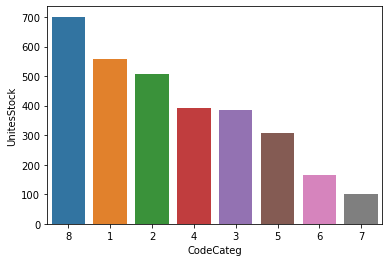

In [3]:
data_0 = df_produit[["CodeCateg", "UnitesStock"]].groupby('CodeCateg', as_index=False).sum("UnitesStock").sort_values('UnitesStock',ascending=False)
sns.barplot(x='CodeCateg', y="UnitesStock", data=data_0, order=data_0["CodeCateg"])

Graphique montrant les catégories de Fonctions qui apparaissent le plus

C:\Users\namor\anaconda3\envs\intro-conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


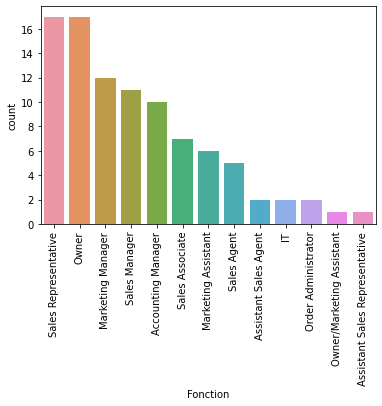

In [4]:
sns.countplot(df_client['Fonction'], order = df_client['Fonction'].value_counts().index)
plt.xticks(rotation="vertical")
plt.show()

C:\Users\namor\anaconda3\envs\intro-conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


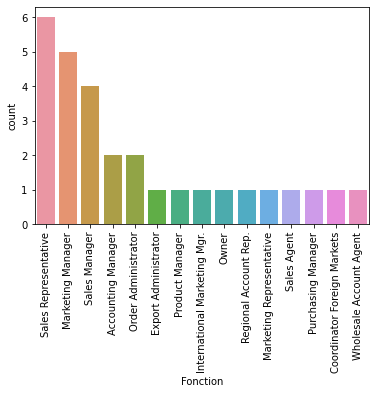

In [5]:
sns.countplot(df_fournisseur['Fonction'], order = df_fournisseur['Fonction'].value_counts().index)
plt.xticks(rotation="vertical")
plt.show()

Plus de 75% des produits sont disponibles

In [6]:
df_categorie=pd.read_csv('data/categorie.csv')
df_client=pd.read_csv('data/client.csv')
df_commande=pd.read_csv('data/commande.csv')
df_detailscommande=pd.read_csv('data/detailscommande.csv')
df_fournisseur=pd.read_csv('data/fournisseur.csv')
df_messager=pd.read_csv('data/messager.csv')
df_produit=pd.read_csv('data/produit.csv')

Assumtions based on data analysis

Correlating (subjectivement).
Budget/Commerce :
- NomCateg
- Portt
- PrixUnit
- Qte
- Remise
- NomProd
- QteParUnit
- UnitesStock
- UnitesCom
- Indisponible

Ressources Humaines :
- Contact
- Fonction

Logistique/Géographie :
- Ville
- Pays
- DateCom
- ALivAvant
- DateEnv
- Destinaire
- VilleLiv
- PaysLiv
- NomMess

Completing.
- Pays (corrélée aux Ressources Humaines)
- Dateenv (corrélée à la logistique)

Correcting (drop).
- Adresse
- Region
- Codepostal
- Tel
- Fax
- AdrLiv
- RegionLiv
- CodePostalLiv
- CodePostal
- PageAccueil
- (UnitesCom)
- NiveauReap

Creating.
- QteParUnit = Quantité * Pack

Classifying.
- Qui sont les clients (entreprises/pays) qui commandent le plus (quantité, budget) ?
- Quel est le chiffre d'affaire des fournisseurs, transporteurs généré par pays ?
- Quelles sont les villes qui commandent le plus en France ? Qu'est-ce qu'ils commandent principalement ?


- Quels sont les catégories de produit les plus commandés ? Par pays ?
- Quels sont les produits les plus commandés ? Par paire ?
- À quel moment les fournisseurs sont prêtes à faire une remise ?
- Quel est le panier moyen d'un client (quantité, budget) ?
- Quels sont les meilleurs produits ? Par pays ?


- Qui sont les employés les plus performants ? Qu'est-ce sont leur domaine de spécialité ?


- Quelle est la durée moyenne d'une livraison ? Par pays ?
- Quelles sont les périodes qui vendent le plus par an ? Mois ? Jour ?
- Quelles sont les entreprises les plus fidèles ? Commandent-ils régulièrement ?
- Quel est le pourcentage de chance qu'un transporteur ne livre pas une commande ? Retard ?
- Pourquoi certaines commandes auraient été annulées (indisponibilité des produits, autre ...) ?



Correcting by dropping features

In [7]:
del df_client['Adresse']
del df_client['Region']
del df_client['Codepostal']
del df_client['Tel']
del df_client['Fax']
del df_commande['AdrLiv']
del df_commande['RegionLiv']
del df_commande['CodePostalLiv']
del df_fournisseur['Adresse']
del df_fournisseur['Region']
del df_fournisseur['CodePostal']
del df_fournisseur['PageAccueil']
del df_produit['UnitesCom']
del df_produit['NiveauReap']
del df_employe['Adresse']
del df_employe['Region']
del df_employe['Codepostal']
del df_employe['TelDom']
del df_employe['Extension']

Qui sont les clients (entreprises/pays) qui commandent le plus (quantité, budget) ?

In [8]:
# Set SQL query as a comment;
sql_query_production = "SELECT Cl.CodeCli, Cl.Societe, Cl.Pays, SUM(Qte) AS Unite, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Commande Co, Client Cl WHERE (De.NoCom = Co.NoCom AND Co.CodeCli = Cl.CodeCli) GROUP BY Cl.CodeCli ORDER BY CA DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_a = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_a.head()

,CodeCli,Societe,Pays,Unite,CA
0,QUICK,QUICK-Stop,Germany,1951.0,45904.815162
1,ERNSH,Ernst Handel,Austria,1905.0,39726.817357
2,SAVEA,Save-a-lot Markets,USA,1654.0,39266.239794
3,RATTC,Rattlesnake Canyon Grocery,USA,892.0,29352.530398
4,MEREP,Mre Paillarde,Canada,945.0,28233.690156


In [9]:
# Set SQL query as a comment;
sql_query_production = "SELECT Cl.Pays, SUM(Qte) AS Unite, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Commande Co, Client Cl WHERE (De.NoCom = Co.NoCom AND Co.CodeCli = Cl.CodeCli) GROUP BY Cl.Pays ORDER BY CA DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_b = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_b.head()

,Pays,Unite,CA
0,USA,3867.0,103985.145157
1,Germany,4563.0,97850.082507
2,Austria,2287.0,55748.377391
3,France,1725.0,41685.069988
4,Brazil,1748.0,37107.740081


Quel est le chiffre d'affaire des fournisseurs, transporteurs généré par pays ?

In [10]:
# Set SQL query as a comment;
sql_query_production = "SELECT Fo.Societe, Fo.Pays, SUM(Qte) AS Unite, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Produit Pr, Fournisseur Fo WHERE (De.Refprod = Pr.Refprod AND Pr.NoFour = Fo.NoFour) GROUP BY Fo.Societe ORDER BY CA DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_c = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_c.head()

,Societe,Pays,Unite,CA
0,Aux joyeux ecclsiastiques,France,670.0,71161.375533
1,Plutzer Lebensmittelgromrkte AG,Germany,1716.0,51683.135222
2,Gai pturage,France,1492.0,51339.060248
3,"Pavlova, Ltd.",Australia,1916.0,47600.304898
4,"G'day, Mate",Australia,971.0,26944.810425


In [11]:
# Set SQL query as a comment;
sql_query_production = "SELECT Fo.Pays, SUM(Qte) AS Unite, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Produit Pr, Fournisseur Fo WHERE (De.Refprod = Pr.Refprod AND Pr.NoFour = Fo.NoFour) GROUP BY Fo.Pays ORDER BY CA DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_d = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_d.head()

,Pays,Unite,CA
0,France,2367.0,124540.935827
1,Germany,2782.0,78124.032768
2,Australia,2887.0,74545.115324
3,Italy,2302.0,50020.874555
4,USA,3055.0,49435.816901


In [12]:
# Set SQL query as a comment;
sql_query_production = "SELECT Me.NomMess, SUM(Port) AS CA FROM Commande Co, Messager Me WHERE (Me.NoMess = Co.NoMess) GROUP BY Me.NoMess ORDER BY CA DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_e = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_e.head()

,NomMess,CA
0,United Package,28244.850044
1,Federal Shipping,20512.510017
2,Speedy Express,16185.329987


United Package

In [13]:
# Set SQL query as a comment;
sql_query_production = "SELECT Co.PaysLiv, SUM(Port) AS CA FROM Commande Co, Messager Me WHERE (Me.NoMess = Co.NoMess) AND Me.NomMess = 'United Package' GROUP BY Co.PaysLiv ORDER BY CA DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_f = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_f.head()

,PaysLiv,CA
0,USA,5778.580009
1,Germany,3964.330002
2,Austria,3065.830042
3,Brazil,2513.430041
4,Ireland,1890.409948


Federal Shipping

In [14]:
# Set SQL query as a comment;
sql_query_production = "SELECT Co.PaysLiv, SUM(Port) AS CA FROM Commande Co, Messager Me WHERE (Me.NoMess = Co.NoMess) AND Me.NomMess = 'Federal Shipping' GROUP BY Co.PaysLiv ORDER BY CA DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_g = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_g.head()

,PaysLiv,CA
0,USA,5697.990018
1,Germany,3646.990005
2,Austria,2107.099989
3,France,1823.370020
4,UK,984.709996


Speedy Express

In [15]:
# Set SQL query as a comment;
sql_query_production = "SELECT Co.PaysLiv, SUM(Port) AS CA FROM Commande Co, Messager Me WHERE (Me.NoMess = Co.NoMess) AND Me.NomMess = 'Speedy Express' GROUP BY Co.PaysLiv ORDER BY CA DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_h = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_h.head()

,PaysLiv,CA
0,Germany,3671.960005
1,USA,2294.720019
2,Austria,2218.569992
3,Brazil,1542.920003
4,France,1149.979991


Quelles sont les villes qui commandent le plus en France ? Qu'est-ce qu'ils commandent principalement ?

In [16]:
# Set SQL query as a comment;
sql_query_production = "SELECT Cl.CodeCli, Cl.Societe, Cl.Ville, SUM(Qte) AS Unite, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Commande Co, Client Cl WHERE (De.NoCom = Co.NoCom AND Co.CodeCli = Cl.CodeCli) AND Co.PaysLiv = 'France' GROUP BY Cl.CodeCli ORDER BY CA DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_i = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_i.head()

,CodeCli,Societe,Ville,Unite,CA
0,BLONP,Blondesddsl pre et fils,Strasbourg,579.0,16694.080079
1,BONAP,Bon app',Marseille,389.0,9263.479968
2,VICTE,Victuailles en stock,Lyon,261.0,6166.379902
3,LAMAI,La maison d'Asie,Toulouse,313.0,5389.729994
4,FOLIG,Folies gourmandes,Lille,93.0,2378.400043


In [17]:
# Set SQL query as a comment;
sql_query_production = "SELECT Pr.NomProd, Ca.NomCateg, SUM(Qte) AS Unite, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Commande Co, Categorie Ca, Produit Pr WHERE (De.NoCom = Co.NoCom AND Pr.CodeCateg = Ca.CodeCateg AND De.RefProd = Pr.RefProd) AND Co.PaysLiv = 'France' GROUP BY De.RefProd ORDER BY CA DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_j = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_j.head()

,NomProd,NomCateg,Unite,CA
0,Tarte au sucre,Desserts,150.0,6306.000137
1,Thringer Rostbratwurst,Meat/Poultry,35.0,3465.000000
2,Carnarvon Tigers,Seafood,68.0,3406.249993
3,Cte de Blaye,drinks,10.0,2108.000031
4,Mozzarella di Giovanni,Dairy Products,72.0,2036.599945


In [18]:
# Set SQL query as a comment;
sql_query_production = "SELECT Ca.NomCateg, SUM(Qte) AS Unite, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Commande Co, Categorie Ca, Produit Pr WHERE (De.NoCom = Co.NoCom AND Pr.CodeCateg = Ca.CodeCateg AND De.RefProd = Pr.RefProd) AND Co.PaysLiv = 'France' GROUP BY Ca.NomCateg ORDER BY CA DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_k = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_k.head()

,NomCateg,Unite,CA
0,Desserts,316.0,8211.900118
1,Seafood,293.0,7123.849940
2,drinks,275.0,6422.119950
3,Meat/Poultry,172.0,5414.420036
4,Dairy Products,256.0,5254.459930


Quels sont les catégories de produit les plus commandés ? Par pays ?

In [19]:
# Set SQL query as a comment;
sql_query_production = "SELECT Ca.NomCateg, SUM(Qte) AS Unite, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Commande Co, Categorie Ca, Produit Pr WHERE (De.NoCom = Co.NoCom AND Pr.CodeCateg = Ca.CodeCateg AND De.RefProd = Pr.RefProd) GROUP BY Ca.NomCateg ORDER BY CA DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_l = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_l.head()

,NomCateg,Unite,CA
0,drinks,4207.0,121095.129869
1,Dairy Products,4622.0,103077.414894
2,Desserts,3792.0,78051.085672
3,Meat/Poultry,2159.0,63981.500724
4,Condiments,2810.0,51243.484385


In [20]:
# Set SQL query as a comment;
sql_query_production = "SELECT Co.PaysLiv, Ca.NomCateg, SUM(De.Qte) AS Unite, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Commande Co, Produit Pr, Categorie Ca  WHERE (De.NoCom = Co.NoCom AND De.RefProd = Pr.RefProd AND Pr.CodeCateg = Ca.CodeCateg) GROUP BY Co.PaysLiv, Ca.CodeCateg ORDER BY CA DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_m = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_m.head()

,PaysLiv,NomCateg,Unite,CA
0,Germany,Dairy Products,1006.0,23205.924898
1,USA,Meat/Poultry,561.0,22255.960170
2,USA,drinks,682.0,22245.075032
3,Germany,drinks,710.0,18682.019821
4,Germany,Desserts,779.0,17594.357768


Quels sont les produits les plus commandés ? Par paire ?

In [21]:
from itertools import combinations
from collections import Counter

count = Counter()

# Set SQL query as a comment;
sql_query_production = "SELECT * FROM DetailCommande De, Commande Co, Produit Pr, Categorie Ca  WHERE (De.NoCom = Co.NoCom AND De.RefProd = Pr.RefProd AND Pr.CodeCateg = Ca.CodeCateg) ;"
# Pr.NomProd, Ca.NomCateg, SUM(De.Qte) AS Unite, SUM((De.PrixUnit * De.Remise + De.PrixUnit) * De.Qte) AS CA

# Use pandas to pass sql query using connection form SQLite3
df_n = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_n = df_n.loc[:,~df_n.columns.duplicated()]

# test = df_n.copy()
# test['test'] = pd.DatetimeIndex(test['DateCom']).year
# test

df_n['Groupe'] = df_n.groupby("NoCom")["Nomprod"].transform(lambda x: ','.join(x))
df_n = df_n[['NoCom', 'Groupe']].drop_duplicates()

for row in df_n["Groupe"]: 
    row_list = row.split(',') 
    count.update(Counter(combinations(row_list, 2))) 

key_list = []
value_list = []
    
for key, value in count.most_common(10):
    key_list.append(', '.join(key))
    value_list.append(value)

df_n = pd.DataFrame({"NomProd":key_list, "Paire":value_list})
df_n

,NomProd,Paire
0,"Chang, Pavlova",4
1,"Gorgonzola Telino, Manjimup Dried Apples",4
2,"Guaran Fantstica, Teatime Chocolate Biscuits",4
3,"Gorgonzola Telino, Mozzarella di Giovanni",4
4,"Louisiana Fiery Hot Pepper Sauce, Jack's New E...",4
5,"Lakkalikri, Gorgonzola Telino",4
6,"Chai, Boston Crab Meat",3
7,"Ipoh Coffee, Alice Mutton",3
8,"Chai, Sir Rodney's Scones",3
9,"Chang, Inlagd Sill",3


À quel moment les fournisseurs sont prêtes à faire une remise ?

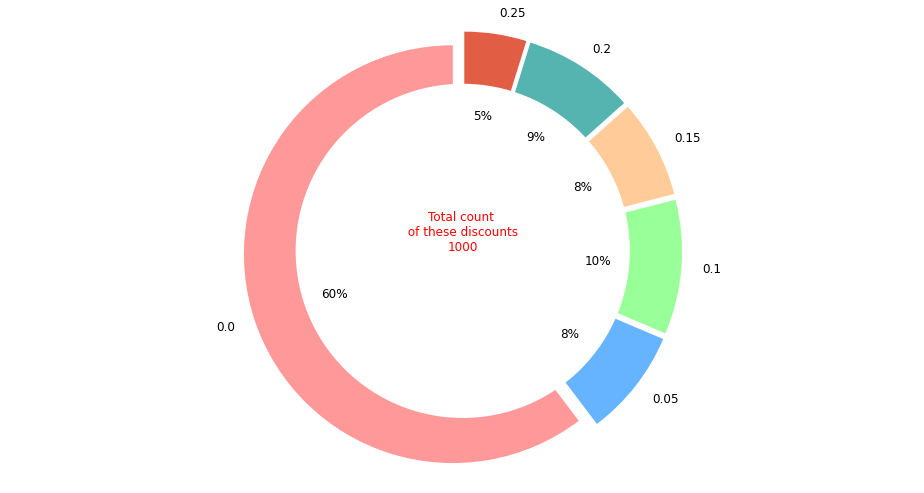

In [22]:
# Set SQL query as a comment;
sql_query_production = "SELECT Remise, COUNT(Remise) FROM DetailCommande GROUP BY Remise ORDER BY Remise ;"

# Use pandas to pass sql query using connection form SQLite3
df_o = pd.read_sql(sql_query_production, conn)

total_count = df_o["COUNT(Remise)"].sum() # To find the total revenue generated as per category
total_count = str(int(total_count)) # Convert the total_revenue_category from float to int and then to string

def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format

plt.rcParams["figure.figsize"] = (13,7) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined for the figure
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44'] # colors are defined for the pie chart
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(df_o['COUNT(Remise)'], colors = colors, labels=df_o['Remise'], autopct='%1.0f%%', startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.80,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
label = ax1.annotate('Total count \n of these discounts \n'+str(total_count),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

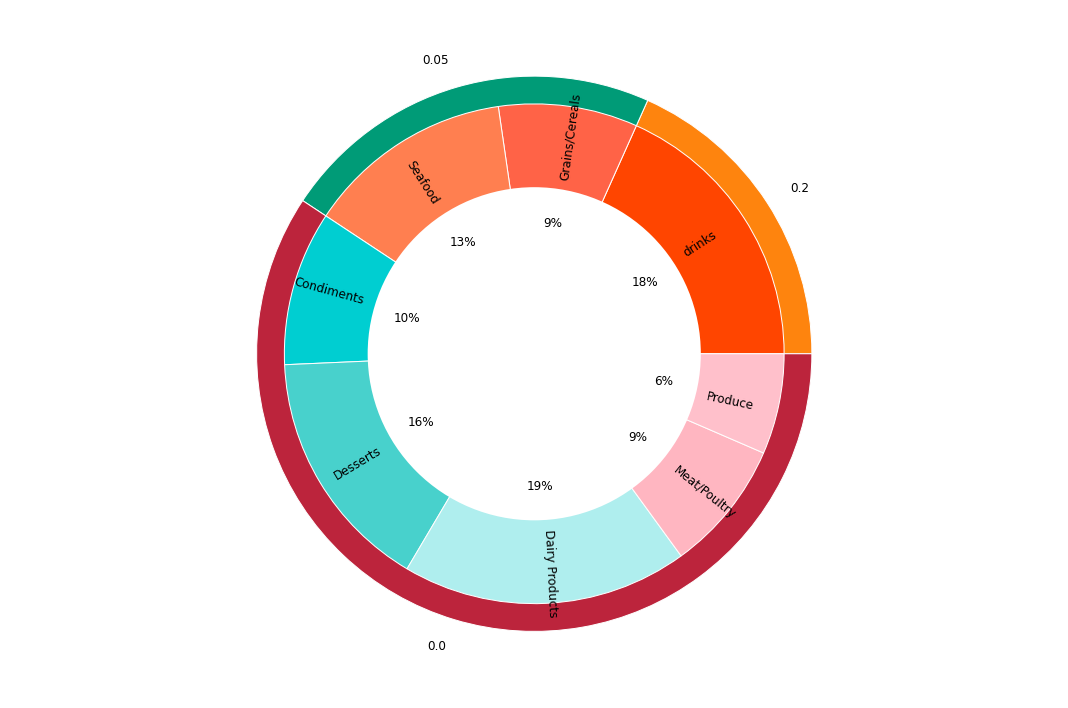

In [23]:
# Set SQL query as a comment;
sql_query_production = "SELECT Remise, Ca.NomCateg, COUNT(Remise) FROM DetailCommande De, Produit Pr, Categorie Ca WHERE (De.RefProd = Pr.RefProd AND Pr.CodeCateg = Ca.CodeCateg) GROUP BY Ca.CodeCateg ORDER BY Remise DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_o = pd.read_sql(sql_query_production, conn)

# Sort both category and  sub category as per the sales
df_o_1 = df_o.groupby(['Remise'], as_index=False).sum().sort_values("Remise", ascending=False)

plt.rcParams["figure.figsize"] = (15,10) # width and height of figure is defined in inches
fig, ax = plt.subplots()
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
width = 0.1
outer_colors = ['#FE840E','#009B77','#BC243C'] # Outer colors of the pie chart
inner_colors = ['Orangered','tomato','coral',"darkturquoise","mediumturquoise","paleturquoise","lightpink","pink"] # inner colors of the pie chart

pie = ax.pie(df_o_1['COUNT(Remise)'], radius=1, labels=df_o_1['Remise'],colors=outer_colors,wedgeprops=dict(edgecolor='w'))
pie2 = ax.pie(df_o['COUNT(Remise)'], radius=1-width, labels=df_o['NomCateg'],autopct='%1.0f%%', labeldistance=0.7, colors=inner_colors, wedgeprops=dict(edgecolor='w'), pctdistance=0.53, rotatelabels=True)

# Rotate fractions
# [0] = wedges, [1] = labels, [2] = fractions
# fraction_text_list = pie2[2]
# for text in fraction_text_list: 
#     text.set_rotation(315) # rotate the autopct values

centre_circle = plt.Circle((0,0),0.6,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Quel est le panier moyen d'un client (quantité, budget) ?

In [24]:
# Set SQL query as a comment;
sql_query_production = "SELECT Cl.Pays, Cl.Societe, SUM(De.Qte) AS Qte, AVG((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS Mean FROM DetailCommande De, Commande Co, Client Cl WHERE (De.NoCom = Co.NoCom AND Co.CodeCli = Cl.CodeCli) GROUP BY Cl.CodeCli ORDER BY Mean DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_p = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_p.head()

,Pays,Societe,Qte,Mean
0,Denmark,Simons bistro,164.0,1768.028588
1,Austria,Piccolo und mehr,382.0,1232.427695
2,Germany,QUICK-Stop,1951.0,1147.620379
3,USA,Save-a-lot Markets,1654.0,1061.249724
4,Brazil,Queen Cozinha,312.0,994.281681


Quels sont les meilleurs produits ? Par pays ?

In [25]:
# Set SQL query as a comment;
sql_query_production = "SELECT Fo.Societe, Fo.Pays, Pr.NomProd, AVG(De.PrixUnit) AS PrixUnit, SUM(De.Qte) AS Qte, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Produit Pr, Fournisseur Fo WHERE(De.RefProd = Pr.RefProd AND Pr.NoFour = Fo.NoFour) GROUP BY De.RefProd ORDER BY CA DESC;"
# Use pandas to pass sql query using connection form SQLite3
df_q = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_q.head()

,Societe,Pays,NomProd,PrixUnit,Qte,CA
0,Aux joyeux ecclsiastiques,France,Cte de Blaye,228.366669,333.0,66562.735651
1,Gai pturage,France,Raclette Courdavault,47.259259,702.0,29977.199940
2,Plutzer Lebensmittelgromrkte AG,Germany,Thringer Rostbratwurst,104.720769,238.0,24068.980027
3,Pasta Buttini s.r.l.,Italy,Gnocchi di nonna Alice,33.030769,685.0,22071.159843
4,Gai pturage,France,Camembert Pierrot,29.860870,790.0,21361.860308


In [26]:
# Set SQL query as a comment;
sql_query_production = "SELECT Fo.Pays, Fo.Societe, Co.PaysLiv, Pr.NomProd, SUM(De.Qte) AS Qte, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Commande Co, Produit Pr, Fournisseur Fo WHERE (De.NoCom = Co.NoCom AND De.RefProd = Pr.RefProd AND Pr.NoFour = Fo.NoFour) GROUP BY Co.PaysLiv, Pr.RefProd ORDER BY CA DESC"

# Use pandas to pass sql query using connection form SQLite3
df_r = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_r.head()

,Pays,Societe,PaysLiv,NomProd,Qte,CA
0,France,Aux joyeux ecclsiastiques,USA,Cte de Blaye,65.0,14084.075143
1,France,Aux joyeux ecclsiastiques,Austria,Cte de Blaye,70.0,12437.200146
2,Germany,Plutzer Lebensmittelgromrkte AG,USA,Thringer Rostbratwurst,111.0,11426.280021
3,France,Aux joyeux ecclsiastiques,Denmark,Cte de Blaye,50.0,10540.000153
4,France,Aux joyeux ecclsiastiques,Canada,Cte de Blaye,49.0,8263.360089


In [27]:
df_employe

,NoEmp,Nom,Prenom,Fonction,TitreCourtoisie,DateNaissance,DateEmbauche,Ville,Pays,RendCompteA
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08 00:00:00,1992-05-01 00:00:00,Seattle,USA,2.0
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19 00:00:00,1992-08-14 00:00:00,Tacoma,USA,NaN
2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30 00:00:00,1992-04-01 00:00:00,Kirkland,USA,2.0
3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19 00:00:00,1993-05-03 00:00:00,Redmond,USA,2.0
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04 00:00:00,1993-10-17 00:00:00,London,UK,2.0
5,6,Suyama,Michael,Sales Representative,Mr.,1963-07-02 00:00:00,1993-10-17 00:00:00,London,UK,5.0
6,7,King,Robert,Sales Representative,Mr.,1960-05-29 00:00:00,1994-01-02 00:00:00,London,UK,5.0
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1958-01-09 00:00:00,1994-03-05 00:00:00,Seattle,USA,2.0
8,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27 00:00:00,1994-11-15 00:00:00,London,UK,5.0


Qui sont les employés les plus performants ? Qu'est-ce sont leur domaine de spécialité ?

In [28]:
# Set SQL query as a comment;
sql_query_production = "SELECT Em.NoEmp, Em.Nom, Em.Prenom, Em.TitreCourtoisie, Em.Fonction, SUM(De.Qte) AS Qte, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Commande Co, Employe Em WHERE (De.NoCom = Co.NoCom AND Co.NoEmp = Em.NoEmp) GROUP BY Co.NoEmp ORDER BY CA DESC"

# Use pandas to pass sql query using connection form SQLite3
df_s = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_s.head()

,NoEmp,Nom,Prenom,TitreCourtoisie,Fonction,Qte,CA
0,4,Peacock,Margaret,Mrs.,Sales Representative,5301.0,123750.405243
1,1,Davolio,Nancy,Ms.,Sales Representative,3741.0,87219.330253
2,3,Leverling,Janet,Ms.,Sales Representative,3421.0,83740.667416
3,6,Suyama,Michael,Mr.,Sales Representative,3294.0,70566.450140
4,2,Fuller,Andrew,Dr.,"Vice President, Sales",2784.0,61642.510305


In [29]:
# Set SQL query as a comment;
sql_query_production = "SELECT Em.NoEmp, Em.Nom, Em.Prenom, Em.TitreCourtoisie, Em.Fonction, Pr.Nomprod, SUM(De.Qte) AS Qte, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Commande Co, Employe Em, Produit Pr WHERE (De.RefProd = Pr.RefProd AND De.NoCom = Co.NoCom AND Co.NoEmp = Em.NoEmp) GROUP BY Co.NoEmp, De.RefProd ORDER BY CA DESC"

# Use pandas to pass sql query using connection form SQLite3
df_s = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_s.head()

,NoEmp,Nom,Prenom,TitreCourtoisie,Fonction,Nomprod,Qte,CA
0,4,Peacock,Margaret,Mrs.,Sales Representative,Cte de Blaye,95.0,20605.700238
1,7,King,Robert,Mr.,Sales Representative,Cte de Blaye,99.0,16695.360180
2,3,Leverling,Janet,Ms.,Sales Representative,Cte de Blaye,60.0,14229.000092
3,1,Davolio,Nancy,Ms.,Sales Representative,Cte de Blaye,35.0,7760.075052
4,4,Peacock,Margaret,Mrs.,Sales Representative,Raclette Courdavault,194.0,7622.999961


Quelle est la durée moyenne d'une livraison ? Par pays ?

In [30]:
# Set SQL query as a comment;
sql_query_production = "SELECT Me.NomMess, DATEDIFF(Co.DateEnv, Co.DateCom) AS Traitement FROM Commande Co, Messager Me WHERE (Co.NoMess = Me.NoMess) GROUP BY Me.NomMess ORDER BY Traitement;"

# Use pandas to pass sql query using connection form SQLite3
df_p = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_p.head()

,NomMess,Traitement
0,Speedy Express,3
1,United Package,4
2,Federal Shipping,12


In [31]:
# Set SQL query as a comment;
sql_query_production = "SELECT Me.NomMess, DATEDIFF(Co.AlivAvant, Co.DateCom) AS Delai FROM Commande Co, Messager Me WHERE (Co.NoMess = Me.NoMess) GROUP BY Me.NomMess ORDER BY Delai;"

# Use pandas to pass sql query using connection form SQLite3
df_p1 = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_p1.head()

,NomMess,Delai
0,United Package,28
1,Federal Shipping,28
2,Speedy Express,40


In [32]:
# Set SQL query as a comment;
sql_query_production = "SELECT Co.PaysLiv, Me.NomMess, DATEDIFF(Co.DateEnv, Co.DateCom) AS Traitement FROM Commande Co, Messager Me WHERE (Co.NoMess = Me.NoMess) GROUP BY Co.PaysLiv, Me.NomMess ORDER BY Traitement;"

# Use pandas to pass sql query using connection form SQLite3
df_q = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_q.head()

,PaysLiv,NomMess,Traitement
0,USA,Federal Shipping,1
1,Finland,Speedy Express,1
2,Norway,Speedy Express,2
3,Portugal,United Package,2
4,Finland,United Package,2


In [33]:
# Set SQL query as a comment;
sql_query_production = "SELECT Co.PaysLiv, Me.NomMess, DATEDIFF(Co.AlivAvant, Co.DateCom) AS Delai FROM Commande Co, Messager Me WHERE (Co.NoMess = Me.NoMess) GROUP BY Co.PaysLiv, Me.NomMess ORDER BY Delai;"

# Use pandas to pass sql query using connection form SQLite3
df_q1 = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_q1.head()

,PaysLiv,NomMess,Delai
0,Spain,Speedy Express,14
1,Venezuela,United Package,14
2,USA,Speedy Express,14
3,Switzerland,Speedy Express,14
4,USA,Federal Shipping,26


Quelles sont les périodes qui vendent le plus par an ? Mois ? Jour ?

In [34]:
# Set SQL query as a comment;
sql_query_production = "SELECT YEAR(DateCom) AS Year, SUM(De.Qte) AS Qte, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Commande Co WHERE (De.NoCom = Co.NoCom) GROUP BY Year ORDER BY Year;"

# '''SELECT YEAR(DateCom) AS Year, MONTH(DateCom) AS Month, DAY(DateCom) AS Day,
#     CASE
#         WHEN DAYOFWEEK(DateCom) = 1 THEN 'Dimanche'
#         WHEN DAYOFWEEK(DateCom) = 2 THEN 'Lundi'
#         WHEN DAYOFWEEK(DateCom) = 3 THEN 'Mardi'
#         WHEN DAYOFWEEK(DateCom) = 4 THEN 'Mercredi'
#         WHEN DAYOFWEEK(DateCom) = 5 THEN 'Jeudi'
#         WHEN DAYOFWEEK(DateCom) = 6 THEN 'Vendredi'
#         WHEN DAYOFWEEK(DateCom) = 7 THEN 'Samedi'
#     END AS Jour FROM Commande;'''

# Use pandas to pass sql query using connection form SQLite3
df_r = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_r.head()

,Year,Qte,CA
0,2006,9581.0,208083.970983
1,2007,14491.0,341030.267288


In [35]:
# Set SQL query as a comment;
sql_query_production = "SELECT YEAR(DateCom) AS Year, MONTH(DateCom) AS Month, SUM(De.Qte) AS Qte, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Commande Co WHERE (De.NoCom = Co.NoCom) GROUP BY Year, Month ORDER BY Year;"

# Use pandas to pass sql query using connection form SQLite3
df_r = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_r

,Year,Month,Qte,CA
0,2006,7,1462.0,27861.895130
1,2006,8,1322.0,25485.275071
2,2006,9,1124.0,26381.400133
3,2006,10,1738.0,37515.724945
4,2006,11,1735.0,45600.045211
5,2006,12,2200.0,45239.630493
6,2007,1,2401.0,61258.070168
7,2007,2,2132.0,38483.634950
8,2007,3,1770.0,38547.220110
9,2007,4,1912.0,53032.952389


In [36]:
# Set SQL query as a comment;
sql_query_production = "SELECT YEAR(DateCom) AS Year, MONTH(DateCom) AS Month, DAY(DateCom) AS Day, SUM(De.Qte) AS Qte, SUM((De.PrixUnit - De.PrixUnit * De.Remise) * De.Qte) AS CA FROM DetailCommande De, Commande Co WHERE (De.NoCom = Co.NoCom) GROUP BY Year, Month, Day ORDER BY Year;"

# Use pandas to pass sql query using connection form SQLite3
df_r = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_r

,Year,Month,Day,Qte,CA
0,2006,7,4,27.0,439.999998
1,2006,7,7,49.0,1863.400064
2,2006,7,8,101.0,2206.660009
3,2006,7,9,105.0,3597.900145
4,2006,7,10,102.0,1444.799984
...,...,...,...,...,...
282,2007,8,4,82.0,1260.000000
283,2007,8,5,60.0,815.999999
284,2007,8,6,38.0,559.999999
285,2007,8,7,120.0,2730.189994


Quelles sont les entreprises les plus fidèles ? Commandent-ils régulièrement ?

In [37]:
d = df_commande[df_commande["CodeCli"] == "GROSR"]
# len(d.index)
d

,NoCom,CodeCli,NoEmp,DateCom,ALivAvant,DateEnv,NoMess,Portt,Destinataire,VilleLiv,PaysLiv
20,10268,GROSR,8,2006-07-30 00:00:00,2006-08-27 00:00:00,2006-08-02 00:00:00,3,66.29,GROSELLA-Restaurante,Caracas,Venezuela
537,10785,GROSR,1,2007-12-18 00:00:00,2008-01-15 00:00:00,2007-12-24 00:00:00,3,1.51,GROSELLA-Restaurante,Caracas,Venezuela


In [38]:
# Set SQL query as a comment;
sql_query_production = "SELECT Co.CodeCli, Cl.Societe, Cl.Pays, COUNT(Co.CodeCli) AS Count, AVG(DAY(DateCom)) AS Moy FROM DetailCommande De, Commande Co, Client Cl WHERE (De.NoCom = Co.NoCom AND Co.CodeCli = Cl.CodeCli) GROUP BY Co.CodeCli ORDER BY Count DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_r = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_r

,CodeCli,Societe,Pays,Count,Moy
0,ERNSH,Ernst Handel,Austria,45,17.7111
1,QUICK,QUICK-Stop,Germany,40,15.9750
2,SAVEA,Save-a-lot Markets,USA,37,17.2162
3,RATTC,Rattlesnake Canyon Grocery,USA,33,16.2727
4,MEREP,Mre Paillarde,Canada,30,14.0000
...,...,...,...,...,...
80,GOURL,Gourmet Lanchonetes,Brazil,2,23.0000
81,LETSS,Let's Stop N Shop,USA,2,25.0000
82,CENTC,Centro comercial Moctezuma,Mexico,2,18.0000
83,FRANS,Franchi S.p.A.,Italy,1,22.0000


In [39]:
# Set SQL query as a comment;
sql_query_production = "SELECT Co.CodeCli, Cl.Societe, Cl.Pays, Co.CodeCli, COUNT(Co.CodeCli) AS Count FROM Commande Co, Client Cl WHERE (Co.CodeCli = Cl.CodeCli) GROUP BY Co.CodeCli ORDER BY Count DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_r = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_r

,CodeCli,Societe,Pays,CodeCli,Count
0,SAVEA,Save-a-lot Markets,USA,SAVEA,31
1,ERNSH,Ernst Handel,Austria,ERNSH,30
2,QUICK,QUICK-Stop,Germany,QUICK,28
3,FOLKO,Folk och f HB,Sweden,FOLKO,19
4,HUNGO,Hungry Owl All-Night Grocers,Ireland,HUNGO,19
...,...,...,...,...,...
84,NORTS,North/South,UK,NORTS,3
85,THECR,The Cracker Box,USA,THECR,3
86,LAZYK,Lazy K Kountry Store,USA,LAZYK,2
87,GROSR,GROSELLA-Restaurante,Venezuela,GROSR,2


Quel est le pourcentage de chance qu'un transporteur ne livre pas une commande ? Retard ?

In [115]:
# Set SQL query as a comment;
sql_query_production = "SELECT Me.NomMess, COUNT(Co.NoMess) AS Apparition FROM Commande Co, Messager Me WHERE (Co.NoMess = Me.NoMess) GROUP BY Co.NoMess ORDER BY Apparition DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_s = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_s

,NomMess,Apparition
0,United Package,326
1,Federal Shipping,255
2,Speedy Express,249


In [116]:
# Set SQL query as a comment;
sql_query_production = '''
    SELECT Me.NomMess, COUNT(Co.NoMess) AS Retard FROM Commande Co, Messager Me WHERE (Co.NoMess = Me.NoMess) AND
    CASE 
        WHEN ALivAvant >= DateEnv THEN 'A l''heure' ELSE 'En Retard'
    END = 'En Retard' AND DateEnv IS NOT NULL GROUP BY Co.NoMess ORDER BY Retard DESC;
    '''

# Use pandas to pass sql query using connection form SQLite3
df_s1 = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_s1

,NomMess,Retard
0,United Package,16
1,Speedy Express,12
2,Federal Shipping,9


In [126]:
# Set SQL query as a comment;
sql_query_production = "SELECT Me.NomMess, COUNT(Co.NoMess) AS NE FROM Commande Co, Messager Me WHERE (Co.NoMess = Me.NoMess) AND Co.DateEnv IS NULL GROUP BY Co.NoMess ORDER BY NE DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_s2 = pd.read_sql(sql_query_production, conn)

# Compile the list of dataframes you want to merge
data_frames = [df_s2, df_s1, df_s]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['NomMess'],
                                            how='outer'), data_frames)
df_merged["Proba NE"] = (df_merged["NE"] / df_merged["Apparition"]) * 100
df_merged["Proba Retard"] = (df_merged["Retard"] / df_merged["Apparition"]) * 100
df_merged

,NomMess,NE,Retard,Apparition,Proba NE,Proba Retard
0,United Package,11,16,326,3.374233,4.907975
1,Federal Shipping,6,9,255,2.352941,3.529412
2,Speedy Express,4,12,249,1.606426,4.819277


Pourquoi certaines commandes auraient été annulées (indisponibilité des produits, autre ...) ?

In [132]:
# Set SQL query as a comment;
sql_query_production = "SELECT Pr.NomProd, Me.NomMess, COUNT(Co.NoMess) AS NE FROM Commande Co, DetailCommande De, Messager Me, Produit Pr WHERE (Co.NoMess = Me.NoMess AND De.RefProd = Pr.RefProd AND De.NoCom = Co.NoCom) AND Co.DateEnv IS NULL GROUP BY Co.NoMess ORDER BY NE DESC;"

# Use pandas to pass sql query using connection form SQLite3
df_t = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_t

,NomProd,NomMess,NE


In [137]:
df_detailscommande[df_detailscommande["NoCom"] == 11073]

,NoCom,RefProd,PrixUnit,Qte,Remise
